# Chapter 6: Probability

In [1]:
import pandas as pd
import sidetable
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom


import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
pandas2ri.activate()
from rpy2.robjects.conversion import localconverter
# import NHANES package
base = importr('NHANES')

with localconverter(ro.default_converter + pandas2ri.converter):
  NHANES = ro.conversion.rpy2py(ro.r['NHANES'])

 
NHANES = NHANES.drop_duplicates(subset='ID')
NHANES['isChild'] = NHANES.Age < 18
NHANES_adult = NHANES.dropna(subset=['Height']).query('Age > 17')

rng = np.random.RandomState(123)


## Figure 6.1

Text(0, 0.5, 'Percentage of votes')

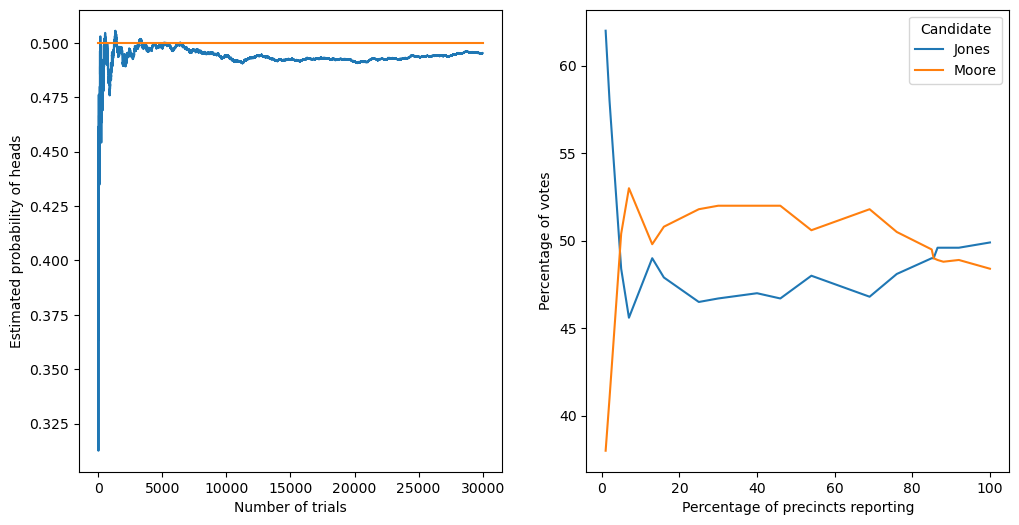

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
nsamples = 30000

pDf = pd.DataFrame({'trial_number': list(range(1, nsamples + 1))})
pDf['outcomes'] = rng.binomial(1, .5, nsamples)
pDf['mean_probability'] = np.cumsum(pDf.outcomes) / pDf.trial_number
pDf = pDf.query('trial_number >= 10')

sns.lineplot(data=pDf, x='trial_number', y='mean_probability', ax=ax[0])
ax[0].plot([10, nsamples], [0.5, 0.5])
ax[0].set_xlabel("Number of trials")
ax[0].set_ylabel("Estimated probability of heads")

electionReturns = pd.read_csv('https://raw.githubusercontent.com/statsthinking21/statsthinking21-figures-data/main/03/alabama_election_returns.csv')
electionReturns = pd.melt(electionReturns, id_vars=['pctResp'],
                         var_name='Candidate', value_name='pctVotes')
sns.lineplot(data=electionReturns, x='pctResp', y='pctVotes', hue='Candidate', ax=ax[1])
ax[1].set_xlabel("Percentage of precincts reporting")
ax[1].set_ylabel("Percentage of votes")


## Figure 6.2

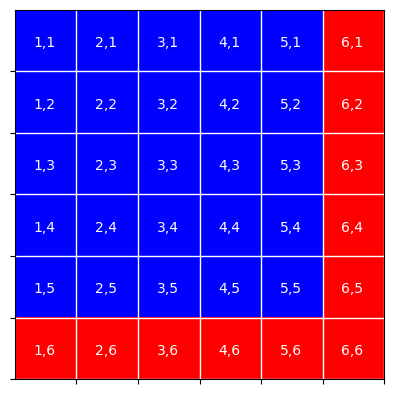

In [7]:
imgmtx = np.zeros((6, 6))
imgmtx[:, -1] = 1
imgmtx[-1, :] = 1

plt.imshow(imgmtx, cmap='bwr')
plt.xticks(np.arange(0.5, 6))
plt.yticks(np.arange(0.5, 6))

plt.grid(color='white', linestyle='-', linewidth=1, which='major')
for i in range(0, 6):
    for j in range(0, 6):
        plt.annotate(f'{i+1},{j+1}', [i-0.2, j+0.1], color='white')
        
plt.setp(plt.gca().get_xticklabels(), visible=False) 
_ = plt.setp(plt.gca().get_yticklabels(), visible=False) 

## Table 6.1

In [8]:
curry_df = pd.DataFrame({'numSuccesses': list(range(0, 5))})
curry_df['Probability'] = binom.pmf(curry_df.numSuccesses, 4, 0.91)
curry_df['CumulativeProbability'] = binom.cdf(curry_df.numSuccesses, 4, 0.91)


curry_df

,numSuccesses,Probability,CumulativeProbability
0,0,0.000066,0.000066
1,1,0.002654,0.002719
2,2,0.040246,0.042965
3,3,0.271286,0.314250
4,4,0.685750,1.000000


## Table 6.2

In [9]:
NHANES_diabetes_activity = NHANES_adult[['PhysActive', 'Diabetes']].dropna()
diabetes_summary = pd.DataFrame(NHANES_diabetes_activity.value_counts('Diabetes'), columns=['counts'])
diabetes_summary['prob'] = diabetes_summary.counts / NHANES_diabetes_activity.shape[0]
print(diabetes_summary)

activity_summary = pd.DataFrame(NHANES_diabetes_activity.value_counts('PhysActive'), columns=['counts'])
activity_summary['prob'] = activity_summary.counts / NHANES_diabetes_activity.shape[0]
print(activity_summary)

          counts      prob
Diabetes                  
No          4251  0.887659
Yes          538  0.112341
            counts      prob
PhysActive                  
Yes           2456  0.512842
No            2333  0.487158


## Table 6.3

In [10]:
NHANES_diabetes_stats_by_activity = pd.DataFrame(
    NHANES_diabetes_activity.value_counts(['Diabetes', 'PhysActive']), columns=['counts'])
NHANES_diabetes_stats_by_activity['prob'] = NHANES_diabetes_stats_by_activity / NHANES_diabetes_activity.shape[0]

NHANES_diabetes_stats_by_activity

counts      prob
Diabetes PhysActive                  
No       Yes           2261  0.472124
         No            1990  0.415536
Yes      No             343  0.071622
         Yes            195  0.040718

## Table 6.4

In [11]:
NHANES_mh = NHANES_adult.dropna(subset=['PhysActive', 'DaysMentHlthBad'])
NHANES_mh['badMentalHealth'] = [
    'Bad Mental Health' if i > 7 else "Good Mental Health" for i in NHANES_mh.DaysMentHlthBad]

NHANES_mentalhealth_by_physactive_counts = pd.crosstab(
            NHANES_mh.PhysActive, 
            NHANES_mh.badMentalHealth,
            margins = True, normalize='all')
NHANES_mentalhealth_by_physactive_counts


badMentalHealth,Bad Mental Health,Good Mental Health,All
PhysActive,,,
No,0.085177,0.402088,0.487265
Yes,0.060543,0.452192,0.512735
All,0.145720,0.854280,1.000000


## Table 6.5

In [12]:

NHANES_mentalhealth_by_physactive_condp = pd.crosstab(
            NHANES_mh.PhysActive, 
            NHANES_mh.badMentalHealth,
            margins = True, normalize='index')

NHANES_mentalhealth_by_physactive_condp

badMentalHealth,Bad Mental Health,Good Mental Health
PhysActive,,
No,0.174807,0.825193
Yes,0.118078,0.881922
All,0.145720,0.854280
